### 딥러닝을 활용한 분류 모델
* keras 활용 iris 모델 딥러닝 layer:2

In [49]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
folder='../../UCI_HAR/'
fname=folder+'test/y_test.txt'
def getY(_fname):
    with open(_fname) as f:
        fread=f.read()
    flist=fread.strip().split('\n')
    print(_fname,"처리완료:",len(flist))
    return (flist)

In [51]:
import re
fname=folder+'test/X_test.txt'

def getX(_fname):
    with open(_fname) as f:
        fread=f.read()
    flist=fread.split('\n')
    res=[]
    for f in flist:
        freg=re.compile("\s+").split(f.strip())
        if(freg):
            res.append(freg)
    print(_fname,"처리완료:",len(res))
    return(res)

In [52]:
def getData():
    fname=folder+'test/X_test.txt'
    X_test=getX(fname)
    fname=folder+'test/y_test.txt'
    y_test=getY(fname)
    fname=folder+'train/X_train.txt'
    X_train=getX(fname)
    fname=folder+'train/y_train.txt'
    y_train=getY(fname)
    return (X_train,X_test,y_train,y_test)

In [53]:
X_train,x_test,Y_train,y_test=getData()


../../UCI_HAR/test/X_test.txt 처리완료: 2948
../../UCI_HAR/test/y_test.txt 처리완료: 2947
../../UCI_HAR/train/X_train.txt 처리완료: 7353
../../UCI_HAR/train/y_train.txt 처리완료: 7352


In [60]:
y_test[0]

'5'

In [61]:
x_test=np.array(x_test[:2947]).astype('float32')
y_test=np.array(y_test[:2947]).astype('float32')
X_train=np.array(X_train[:7352]).astype('float32')
Y_train=np.array(Y_train[:7352]).astype('float32')

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [66]:
model=Sequential()
model.add(Dense(256,input_shape=(561,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              
             )
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               143872    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 7)                 903       
Total params: 177,671
Trainable params: 177,671
Non-trainable params: 0
_________________________________________________________________


In [67]:
hist= model.fit(X_train,Y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
230/230 [==============================] - 1s 3ms/step - loss: 0.6064 - accuracy: 0.7574 - val_loss: 0.3108 - val_accuracy: 0.8554
Epoch 2/100
230/230 [==============================] - 1s 2ms/step - loss: 0.1446 - accuracy: 0.9493 - val_loss: 0.3765 - val_accuracy: 0.8497
Epoch 3/100
230/230 [==============================] - 1s 2ms/step - loss: 0.1509 - accuracy: 0.9443 - val_loss: 0.1636 - val_accuracy: 0.9362
Epoch 4/100
230/230 [==============================] - 1s 2ms/step - loss: 0.1020 - accuracy: 0.9586 - val_loss: 0.2226 - val_accuracy: 0.9192
Epoch 5/100
230/230 [==============================] - 1s 2ms/step - loss: 0.0937 - accuracy: 0.9620 - val_loss: 0.1672 - val_accuracy: 0.9365
Epoch 6/100
230/230 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.9706 - val_loss: 0.1546 - val_accuracy: 0.9457
Epoch 7/100
230/230 [==============================] - 1s 3ms/step - loss: 0.0716 - accuracy: 0.9743 - val_loss: 0.1726 - val_accuracy: 0.9423

In [68]:
histdf=pd.DataFrame(hist.history)

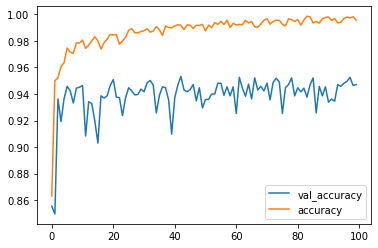

In [69]:
histdf[['val_accuracy','accuracy']].plot()
plt.show()

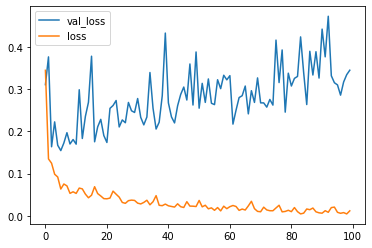

In [70]:
histdf[['val_loss','loss']].plot()
plt.show()